In [69]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
# nltk.download('wordnet')
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.utils import check_X_y
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.linear_model import LogisticRegression




lemmatizer = WordNetLemmatizer()

In [3]:
# Preprocessing of the dataset
df=np.load('data_train.pkl', allow_pickle=True)
labels=np.unique(df[1])
n_labels=len(labels)
    # Number of exemples
N=len(df[0])

kfold=StratifiedKFold(5,True)
kfold.get_n_splits(df[0],df[1])
words=set(stopwords.words('english'))

In [8]:
lab=LabelBinarizer()
lab.fit(df[1])
train_index, test_index = kfold.split(df[0],df[1]).__next__()

In [29]:
low0=20
high=2800
test_score=[]
train_score=[]
for train_index, test_index in kfold.split(df[0],df[1]):
    y_train, y_test=np.array(df[1])[train_index], np.array(df[1])[test_index]
    vectorizer=TfidfVectorizer(stop_words='english',min_df=low0,max_df=high,strip_accents='ascii') # 
    X_train=vectorizer.fit_transform(np.array(df[0])[train_index])
    X_test=vectorizer.transform(np.array(df[0])[test_index])
    print(X_train.shape)
    model=MultinomialNB(alpha=0.14)
    model.fit(X_train,y_train)
    test_score.append(model.score(X_test,y_test))
    train_score.append(model.score(X_train,y_train))
final_test_score=np.mean(test_score)
final_train_score=np.mean(train_score)
print(final_test_score,final_train_score)
    
    

(56000, 6515)
(56000, 6516)
(56000, 6507)
(56000, 6555)
(56000, 6505)
0.5013428571428571 0.6548535714285715


In [11]:
low0=4
high=10000
y_train, y_test=np.array(df[1])[train_index], np.array(df[1])[test_index]
# vectorizer=TfidfVectorizer(stop_words='english',min_df=low0,max_df=high,strip_accents='ascii') # 
vectorizer=CountVectorizer(stop_words='english',min_df=low0,max_df=high,strip_accents='ascii') # 
X_train=vectorizer.fit_transform(np.array(df[0])[train_index])
X_test=vectorizer.transform(np.array(df[0])[test_index])

In [ ]:
model=SVC(kernel='linear', gamma='auto')
model.fit(X_train,y_train)
print(model.score(X_test,y_test),model.score(X_train, y_train))

# lab=LabelBinarizer()
# lab.fit(train_set[1])
# print(lab.classes_)

In [12]:
ki2=chi2(X_train,y_train)
index2=(ki2[1]<0.0001)
print(index2.sum())
print((X_train[:,index2].sum(axis=1)==0).sum())
# model=SVC(kernel='linear',gamma='auto')

8923
78


In [38]:
bestchi2=np.argmax(ki2[0])
print(bestchi2)
temp_ind=np.ones(X_train.shape[1],dtype=bool)
temp_ind[bestchi2]=False
ki22=chi2(X_train[:,temp_ind],y_train)
bestchi22=(np.argmax(ki22[0]))


11532


In [273]:
model=MultinomialNB(alpha=0.15)
model.fit(X_train[:,index2],y_train)
print(model.score(X_test[:,index2],y_test),model.score(X_train[:,index2], y_train))


0.547 0.6409107142857143


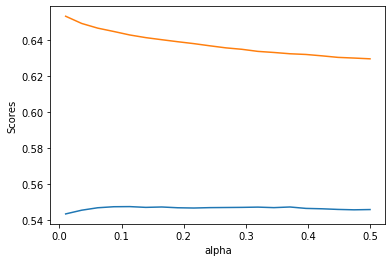

0.1131578947368421 0.5472857142857143 0.642875


In [208]:
alpha=np.linspace(0.01,0.5,20)
test_scores=np.zeros(len(alpha))
train_scores=np.zeros(len(alpha))

for i in range(len(alpha)):
    model=MultinomialNB(alpha=alpha[i])
    model.fit(X_train[:,index2],y_train)
    test_scores[i], train_scores[i]=model.score(X_test[:,index2],y_test),model.score(X_train[:,index2], y_train)

plt.plot(alpha,test_scores)
plt.plot(alpha,train_scores)
plt.xlabel('alpha')
plt.ylabel('Scores')
plt.show()

ind=np.argmax(test_scores)
print(alpha[ind], test_scores[ind], train_scores[ind])


In [197]:
print((ki2[1][index2]).max())

9.686218589594897e-05


In [19]:
from sklearn.ensemble import BaggingClassifier,  AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb

In [123]:
model=BaggingClassifier(AdaBoostClassifier(BaggingClassifier(AdaBoostClassifier(MultinomialNB(alpha=0.5),n_estimators=2),n_estimators=10,n_jobs=-1),n_estimators=2),n_estimators=10,n_jobs=-1)
model.fit(X_train[:,index2],y_train)

BaggingClassifier(base_estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                    base_estimator=BaggingClassifier(base_estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                                                                                       base_estimator=MultinomialNB(alpha=0.5,
                                                                                                                                                    class_prior=None,
                                                                                                                                                    fit_prior=True),
                                                                                                                       learning_rate=1.0,
                                                                                                                       n_estimators=2,
                        

In [124]:
model.score(X_test[:,index2],y_test)

0.2797857142857143

In [106]:
# model=AdaBoostClassifier(MultinomialNB(alpha=alpha[ind]), n_estimators=500,learning_rate=1.,algorithm='SAMME.R')
# model=BaggingClassifier(MultinomialNB(alpha=0.15), n_estimators=100, oob_score=True)
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2]
# Method of selecting samples for training each tree
bootstrap = [True]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train[:,index2],y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


ValueError: Found input variables with inconsistent numbers of samples: [56000, 14000]

In [109]:
rf_random.score(X_test[:,index2],y_test)
rf_random.best_params_

{'n_estimators': 80,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [108]:
rf_random.score(X_test[:,index2],y_train)

ValueError: Found input variables with inconsistent numbers of samples: [56000, 14000]

In [119]:
# model = xgb.XGBClassifier(objective="multi:softprob", random_state=42,n_jobs=-1,learning_rate=0.3,n_estimators=500)
model=RandomForestClassifier(n_estimators=1000, min_samples_split=20, min_samples_leaf=6,bootstrap=True, max_depth=None, max_features='auto',n_jobs=-1)
# model=LogisticRegression(solver='newton-cg', multi_class='multinomial',warm_start=True)
model.fit(X_train[:,index2],y_train)
print(model.score(X_test[:,index2],y_test),model.score(X_train[:,index2], y_train))


0.43935714285714284 0.5389642857142857


In [215]:
sc=list(model.staged_score(X_train[:,index2], y_train))
print(sc[0])
num_show=10
for i in range(len(sc)//num_show):
    print(sc[i*num_show])

0.29546428571428573
0.29546428571428573
0.36964285714285716
0.39905357142857145
0.41896428571428573
0.4335357142857143
0.44492857142857145
0.45376785714285717
0.4614464285714286
0.4682142857142857
0.4747142857142857
0.47978571428571426
0.4835357142857143
0.487125
0.49060714285714285
0.49423214285714284
0.49705357142857143
0.4993214285714286
0.5019464285714286
0.5036607142857142
0.5055892857142857
0.5074464285714285
0.508875
0.5105892857142857
0.5122857142857142
0.513375
0.5150535714285714
0.516125
0.5171428571428571
0.5186428571428572
0.519625
0.5202857142857142
0.5207321428571429
0.5213214285714286
0.5217142857142857
0.5221964285714286
0.52325
0.523625
0.5240178571428571
0.5245178571428571
0.5249107142857142
0.5250178571428571
0.5254464285714285
0.5256785714285714
0.5258928571428572
0.5261071428571429
0.5264107142857143
0.526375
0.5261964285714286
0.5264107142857143
0.5265535714285714


In [295]:
vectorizer2=TfidfVectorizer(stop_words='english',min_df=2, max_df=1400, strip_accents='ascii')
X_train2=vectorizer2.fit_transform(np.array(df[0])[train_index])
X_test2=vectorizer2.transform(np.array(df[0])[test_index])

In [300]:
model=BaggingClassifier(MultinomialNB(alpha=0.45), n_estimators=500, oob_score=True)
# model=MultinomialNB(alpha=0.45)
model.fit(X_train2[:,:],y_train)
print(model.score(X_test2,y_test),model.score(X_train2, y_train))

0.5660714285714286 0.7943928571428571


In [32]:
# Boosting without bagging
n=X_train.shape[0]
T=5
D=np.ones(n,dtype=int)
test_pred=np.zeros((T,len(y_test),n_labels))
train_pred=np.zeros((T,len(y_train),n_labels))
print(train_pred[0].shape)
a=np.zeros(T)
for i in range(T):
    model0=MultinomialNB(alpha=0.15)
    model0.fit(X_train[:,:],y_train,D)
    train_p=model0.predict(X_train[:,:])
    print(model0.score(X_train[:,:],y_train), model0.score(X_test[:,:],y_test))
    # a[i]=0.5*np.log(1/error - 1)
    # D=D*((train_p==y_train)*np.exp(-a[i])+(1-(train_p==y_train))*np.exp(a[i]))
    # D+=(train_p!=y_train)
    D+=1
    # D/=D.sum()
    test_pred[i]=lab.transform(model0.predict(X_test[:,:]))
    train_pred[i]=lab.transform(train_p)
    for i in labels:
        print(((train_p!=y_train)*(y_train==i)).sum())

(56000, 20)
0.7294821428571429 0.5402142857142858
1111
699
1141
608
603
696
806
853
756
1071
647
681
610
581
614
746
668
630
1118
510
0.7389285714285714 0.5372857142857143
1079
664
1124
594
577
678
780
823
734
1013
617
668
588
559
594
726
646
603
1066
487
0.7433928571428572 0.5345
1070
649
1102
583
573
667
762
802
721
998
604
661
582
544
586
718
636
594
1040
478
0.7459464285714286 0.5317142857142857
1057
639
1096
580
569
659
751
792
714
982
602
657
573
544
579
711
633
594
1022
473
0.7475 0.53
1055
639
1085
577
564
654
743
787
708
973
596
655
570
541
578
711
631
591
1013
469


In [18]:
model1=BaggingClassifier(MultinomialNB(alpha=0.15),n_estimators=100,n_jobs=-1,bootstrap_features=True, oob_score=True,max_features=0.1)
model1.fit(X_train,y_train)
print(model1.score(X_train[:,:],y_train), model1.score(X_test[:,:],y_test))

NameError: name 'BaggingClassifier' is not defined

In [395]:
# New Score on the training set
final_test_pred=lab.inverse_transform(np.sum(test_pred,axis=0))
final_train_pred=lab.inverse_transform(np.sum(train_pred,axis=0))
print(np.sum(final_test_pred==y_test)/len(y_test))
print(np.sum(final_train_pred==y_train)/len(y_train))

0.5117857142857143
0.9585


In [122]:
from sklearn.neural_network import MLPClassifier as mlp

model=mlp((100,),solver='sgd',early_stopping=True,max_iter=1000)
model.fit(X_train[:,index2],y_train)
model.score(X_test[:,index2],y_test)

0.4749285714285714

In [123]:
model.score(X_train[:,index2],y_train)

0.49910714285714286

In [40]:
from sklearn import preprocessing
lab2=preprocessing.LabelEncoder()
lab2.fit(y_train)
y=lab2.transform(y_train)
best2ind=np.argsort(ki2[0])[-2:]
first_label=1
second_label=2
index=np.logical_or(y==first_label,y==second_label)

In [163]:
print(index.shape)
print(np.array(X_train[1].todense()).flatten().shape)

(56000,)
(6505,)


In [71]:
tfidf=TfidfTransformer()
x=tfidf.fit_transform(X_train, y_train)

In [75]:
best_tfidf=x.sum(axis=0).argmax()

<Figure size 432x288 with 0 Axes>

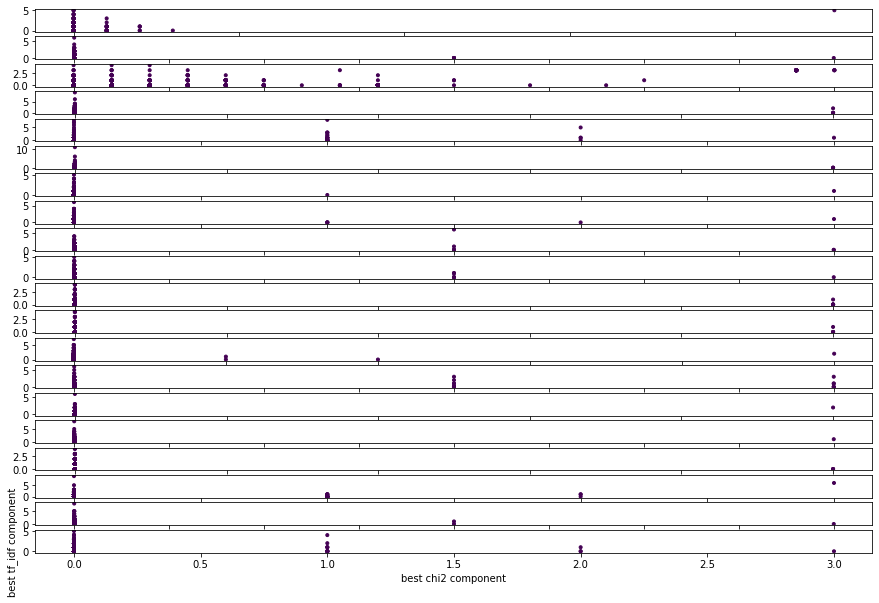

In [101]:
plt.figure()
# for i in range(n_features-1):
#     for j in range(i+1,n_features):
i=0
fig, axs=plt.subplots(20, figsize=(15,10))
for label in labels:
    axs[i].scatter(np.array(X_train[y_train==label,bestchi2].todense()).flatten(),np.array(X_train[y_train==label,best_tfidf].todense()).flatten(),c=y[y_train==label], marker='.')
    plt.xlabel('best chi2 component')
    plt.ylabel('best tf_idf component')
    i+=1
# plt.legend(*scatter.legend_elements(num=2))
plt.show()

In [ ]:

# vectorizer=CountVectorizer(train_set[0],stop_words=words, min_df=5, max_df=10000)
# vectorizer=TfidfVectorizer(train_set[0], stop_words='english',min_df=low0,max_df=high) # 
# vectorizer=HashingVectorizer(train_set[0], stop_words='english', alternate_sign=False, n_features=82925 )



In [102]:
MI=mutual_info_classif(X_train,y_train)

In [103]:
bestMI=np.argmax(MI)

In [ ]:
index1=(np.argsort(MI)[-21000:])
# ind=np.argmax(X_train,axis=1)
# index=np.unique(np.array(ind),return_counts=True)
# index1=(index[0][index[1]>4])
print(index1.shape)

# model=MultinomialNB(alpha=0.5)
model=NearestCentroid()
model.fit(X_train[:,index1],y_train)
print(model.score(X_val[:,index1],y_val))
model.score(X_train[:,index1],y_train)


In [36]:
print(vectorizer.inverse_transform(X_train[0]))
print(vectorizer.transform(['buffalo']))

[array(['lottery', 'draft', 'change', 'responsible', 'competitive', 'term',
       'destruction', 'systematic', 'years', '10', 'better', 'travesty',
       'office', 'edmonton', 'think', 'traded', 'game', 'win', 'goalies',
       'starting', 'mantra', 'joking', 'somewhat', 'people', 'remember',
       'answer', 'correct', 'buffalo', 'honestly'], dtype='<U72')]
[[ 3020]
 [19510]
 [ 7209]
 ...
 [17138]
 [  967]
 [ 7744]]
  (0, 3020)	1.0


In [310]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
import string
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t.lower()) for t in word_tokenize(doc) if t.isalpha()]

vect = CountVectorizer(stop_words=words,min_df=2, max_df=1400,tokenizer=LemmaTokenizer())  
X_train2=vect.fit_transform(np.array(df[0])[train_index])
X_test2=vect.transform(np.array(df[0])[test_index])

C:\Users\joss1\Anaconda3\envs\test\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'doe', 'ha', 'might', 'must', 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [365]:
print(X_train2.shape)
ki2=chi2(X_train2,y_train)
index2=(ki2[1]<0.1)
print(index2.sum())
print((X_train2[:,index2].sum(axis=1)==0).sum())

(56000, 25714)
15736
105


In [366]:
# model=BaggingClassifier(MultinomialNB(alpha=0.45), n_estimators=500, oob_score=True)
model=MultinomialNB(alpha=1)
model.fit(X_train2[:,index2],y_train)
print(model.score(X_test2[:,index2],y_test),model.score(X_train2[:,index2], y_train))


0.5395714285714286 0.6521785714285714


In [16]:
df2=np.load('data_test.pkl', allow_pickle=True)
test_vec=vectorizer.transform(df2)
pred2=model.predict(test_vec[:,index2])

In [17]:
submission=pd.DataFrame(enumerate(pred2), columns=['Id','Category'])

submission.to_csv('submission3.csv', index=False)


